In [6]:
import pandas as pd
%matplotlib inline

# pandasのグラフ機能

In [3]:
titanic_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv"
df = pd.read_csv(titanic_url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


ｋのデータについて、データ数は891、Ageはいくつか欠損している。欠損レコードを省くとデータ数が激減するため、補完することとする。補完にはいくつかの考え方(min, max, mean)があり、あまり意味はないが中央値(median)を採用する。

In [4]:
df['Age'].fillna(df.Age.median(), inplace=True)

乗客の年齢構成を円グラフで見る。体力的な観点から、子供(child)を15歳未満、成年(adult)を15歳以上60歳未満、高齢者(elderly)を60歳以上とした。

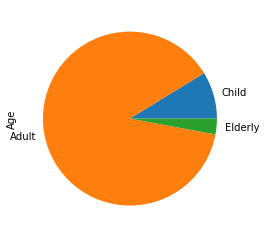

In [7]:
age1 = (df['Age'] < 15).sum()
age2 = ((df['Age'] >= 15) & (df['Age'] < 60)).sum()
age3 = (df['Age'] >= 60).sum()

series = pd.Series([age1, age2, age3], index=['Child', 'Adult', 'Elderly'], name='Age')
series.plot.pie(figsize=(4, 4))

男女別の生存のクロス集計(cross tabulation)を求めて、その棒グラフ(bar graph)を見る。

In [10]:
cross_01 = df.pivot_table(index=['Survived'], columns=['Sex'], \
                          values=['PassengerId'], aggfunc='count', fill_value=0)
cross_01

PassengerId     
Sex           female male
Survived                 
0                 81  468
1                233  109

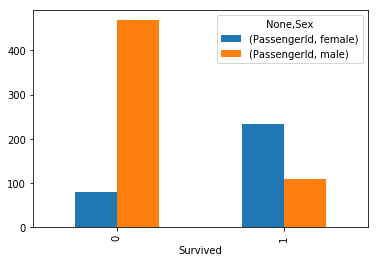

In [11]:
cross_01.plot(kind='bar')